#### Breadth First Search

In this notebook / blog post we will explore breadth first search, which is an algorithm for searching a given graph for the lowest cost path to a goal state $G$.

The _cost_ is intentionally abstract as it can be defined as whatever you'd like it to be, whether it be the least amount of vertices traversed to get to $G$ or whether it be the lowest sum of the weights of edges between a given state and the goal state, $G$.

Some quick notational and fundamental review of the definition of a graph is below :

* Vertex
    * End state, also called a node, of a given path through a graph $G$
    * Can also house additional information known as a _payload_

* Edge
    * Also called an arc, the element that connects two vertices within a graph
    * Can be either one way or two way; one way = **directed graph** or **digraph**
    
* Weight
    * A value assigned to an edge to denote "cost" of traversing that edge between two vertices

With these definitions we can formally define as a graph, $G$ where $G = (V,E)$.

$V$ is a set of vertices and $E$ is a set of edges, respectively.

Each edge is a tuple $(v,w)$ where $w,v \in V$, adding $w$ as a third component to represent the weight of that vertex.

* Path
    * A sequence of edges that connect two vertices.
    * Formally defined as $\{w_{1},w_{2},...,w_{n}\}$ such that $(w_{i},w_{i+1}) \in E \ \ \ \forall 1 \le i \le n-1$
    
There are great libraries that provide Graph ADT's, but in this example we'll implement a Graph class ourselves. It will be useful in understanding a graph and how we can use it.

We'll define two classes to support this effort, a `Vertex` class, which will represent a given vertex being added to the graph, and a `Graph` class which holds the master list of vertices.

In [1]:
class Vertex:
    def __init__(self, key):
        # unique ID for vertex
        self.id = key
        # dict of connected nodes
        self.connected_to = {}
    
    def add_neighbor(self, neighbor, weight=0):
        # Add an entry to the connected_to dict with a given
        # weight 
        self.connected_to[neighbor] = weight
        
    def __str__(self):
        # override __str__ for printing
        return(str(self.id) + ' connected to: ' + str([x.id for x in self.connected_to]))
    
    def get_connections(self):
        # return keys from connected_to dict
        return self.connected_to.keys()
    
    def get_id(self):
        # return vertex id's
        return self.id
    
    def get_weight(self):
        # return weights of edges connected to vertex
        return self.connected_to[neighbor]

In [2]:
class Graph:
    def __init__(self):
        # dictionary of vertices
        self.vertices_list = {}
        # vertex count
        self.num_vertices = 0
        
    def add_vertex(self, key):
        # increment counter when adding vertex
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(key)
        self.vertices_list[key] = new_vertex
        return new_vertex
    
    def get_vertex(self, n):
        # check if vertex exists, return if True
        if n in self.vertices_list:
            return self.vertices_list[n]
        else:
            return None
        
    def __contains__(self, n):
        # override __contains__ to list all vertices in Graph object
        return n in self.vertices_list
    
    def add_edge(self, s, f, cost=0):
        # add edge to graph; s = start node; e = end node
        if s not in self.vertices_list:
            nv = self.add_vertex(s)
        if f not in self.vertices_list:
            nv = self.add_vertex(f)
        self.vertices_list[s].add_neighbor(self.vertices_list[f], cost)
        
    def get_vertices(self):
        # return keys of vertices in Graph
        return self.vertices_list.keys()
    
    def __iter__(self):
        # override __iter__ to return iterable of vertices
        return iter(self.vertices_list.values())
    

In [3]:
node_names = ["A", "B", "C",
              "D", "E", "F",
              "G"]
# Instantiate graph object and add vertices
g = Graph()
for i in node_names:
    g.add_vertex(i)

In [4]:
# add a bunch of edges between vertices
g.add_edge('A','B')
g.add_edge('B','C')
g.add_edge('C','E')
g.add_edge('E','D')
g.add_edge('D','B')
g.add_edge('E','F')
g.add_edge('B','E')
for v in g:
    for w in v.get_connections():
        print("(%s, %s)" % (v.get_id(), w.get_id()))

(A, B)
(C, E)
(B, E)
(B, C)
(E, F)
(E, D)
(D, B)


In [5]:
# list our vertices
for i in node_names:
    print(g.get_vertex(i))

A connected to: ['B']
B connected to: ['E', 'C']
C connected to: ['E']
D connected to: ['B']
E connected to: ['F', 'D']
F connected to: []
G connected to: []


In [6]:
from collections import deque

def breadth_first_search(starting_node, goal_node):
    visited_nodes = set()
    queue = deque([starting_node])
    
    while len(queue) > 0:
        node = queue.pop()
        if node in visited_nodes:
            continue
        
        visited_nodes.add(node)
        if node.get_id == goal_node.get_id:
            return True
        
        for n in node.connected_to:
            if n not in visited_nodes:
                queue.appendleft(n)
    return False        

Using the `breadth_first_search` implementation that we've written, above, we can then ask the graph is there exists a path between multiple nodes. Our function will return a `True` or a `False` accordingly.

In [81]:
breadth_first_search(g.get_vertex('A'), g.get_vertex('G'))

False

Past creating our own Vertex and Graph objects that we can use to assemble our own graphs, we can use libraries like NetworkX to create graphs and implement algorithms, like breadth first search, over them.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


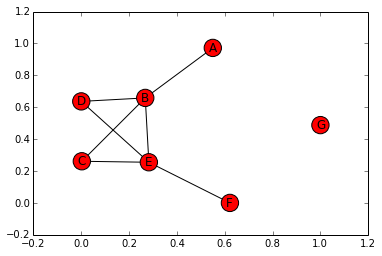

In [8]:
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

edges = [('A','B'),('B','C'),('C','E'),
         ('E','D'),('D','B'),('E','F'),
         ('B','E')]

networkx_graph = nx.Graph()

for node in node_names:
    networkx_graph.add_node(node)

networkx_graph.add_edges_from(edges)

nx.draw_networkx(networkx_graph)

But the library also has the added ability to generate random graphs for us. In this case, the `dense_gnm_random_graph()` will generate a random graph of $G_{n,m}$ where $n$ is the node count and $m$ are the number of edges randomly distributed throughout the graph.

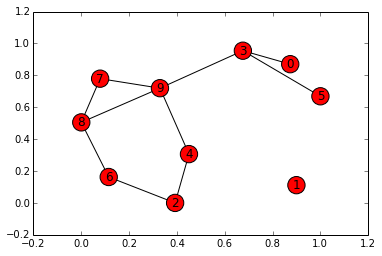

In [57]:
networkx_graph_1 = nx.dense_gnm_random_graph(10,10)

nx.draw_networkx(networkx_graph_1)

The networkx library tends to return iterators for each object within the graph context, such as the graph iteself, or the nodes within a graph or the neighbors of a particular node within the graph. This is useful because traversal algorithms such as breadth first search tend to operator in an iterative manner.

`nodes` returns an iterable for the nodes in a graph

`all_neighbors` returns an interable for all neighbors of a passed in graph and specific node

In [91]:
# quick hack to traverse the iterables returned
for node in nx.nodes(networkx_graph_1):
    neighbors = []
    for neighbor in nx.all_neighbors(networkx_graph_1, node):
        neighbors.append(neighbor)
    print("Node %s has neighbors : %s" % (node, neighbors))   

Node 0 has neighbors : [3]
Node 1 has neighbors : []
Node 2 has neighbors : [4, 6]
Node 3 has neighbors : [0, 9, 5]
Node 4 has neighbors : [9, 2]
Node 5 has neighbors : [3]
Node 6 has neighbors : [8, 2]
Node 7 has neighbors : [8, 9]
Node 8 has neighbors : [9, 6, 7]
Node 9 has neighbors : [8, 3, 4, 7]


Or just because, here's a list comprehension that can do the same thing, that actually shows off a bit of Python's nested list comprehension functionality. It is possible to also push the `print` function into the list comprehension below, but it only works in Python 3+ and but is not considered pythonic -- so I'm only leaving it to return the nested arrays that a list comprehension normally would.

In [101]:
[[neighbor for neighbor in nx.all_neighbors(networkx_graph_1, node)] for node in nx.nodes(networkx_graph_1)]

[[3],
 [],
 [4, 6],
 [0, 9, 5],
 [9, 2],
 [3],
 [8, 2],
 [8, 9],
 [9, 6, 7],
 [8, 3, 4, 7]]

The networkx library also includes many, many algorithm implementations already so we can utilize their built-in `breadth_first_search` algorithm, as we see below. We're able to print a traversal of the graph starting at `node 0` and print the entire path taken through the graph.

In [79]:
print(list(nx.bfs_edges(networkx_graph_1, 0)))

[(0, 3), (3, 9), (3, 5), (9, 8), (9, 4), (9, 7), (8, 6), (4, 2)]


Much like we see above, the networkx library also has a built-in depth first search algorithm that will traverse the graph and return an unordered list of tuples of edges that are traversed. I will save a depth first search implementation over our custom Graph object for future posts.

In [80]:
print(list(nx.dfs_edges(networkx_graph_1, 0)))

[(0, 3), (3, 9), (9, 8), (8, 6), (6, 2), (2, 4), (8, 7), (3, 5)]


##### References 

[Problem Solving with Algorithms and Data Structures](https://interactivepython.org/courselib/static/pythonds/index.html)

[NetworkX Documentation](http://networkx.readthedocs.io/en/networkx-1.11/index.html)